In [89]:
# Importing the necessary libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [90]:
# Read the dataset
ratings = pd.read_csv("https://raw.githubusercontent.com/Vatsal328/Movie-Recommendation-System/main/Dataset/ratings.csv")
# links = pd.read_csv("https://raw.githubusercontent.com/Vatsal328/Movie-Recommendation-System/main/Dataset/links.csv")
tags = pd.read_csv("https://raw.githubusercontent.com/Vatsal328/Movie-Recommendation-System/main/Dataset/tags.csv")
movies = pd.read_csv("https://raw.githubusercontent.com/Vatsal328/Movie-Recommendation-System/main/Dataset/movies.csv")
tmdb = pd.read_csv("https://raw.githubusercontent.com/Vatsal328/Movie-Recommendation-System/main/Preprocessing%20code/TMDB%20data.csv")
imdb = pd.read_csv("https://raw.githubusercontent.com/Vatsal328/Movie-Recommendation-System/main/Preprocessing%20code/IMDB%20data.csv")

In [91]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [92]:
tmdb

,movieId,imdbId,tmdbId,user_score,language,budget,revenue
0,1,114709,862.0,80.0,English,30000000.0,394400000.0
1,2,113497,8844.0,72.0,English,65000000.0,262821940.0
2,3,113228,15602.0,65.0,English,25000000.0,71500000.0
3,4,114885,31357.0,63.0,English,16000000.0,81452156.0
4,5,113041,11862.0,63.0,English,NaN,76594107.0
...,...,...,...,...,...,...,...
9737,193581,5476944,432131.0,77.0,Japanese,NaN,NaN
9738,193583,5914996,445030.0,78.0,Japanese,NaN,6000000.0
9739,193585,6397426,479308.0,68.0,English,NaN,NaN
9740,193587,8391976,483455.0,82.0,Japanese,NaN,NaN


In [93]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [94]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [95]:
imdb

,movieId,imdbId,tmdbId,Ratings,Popularity,User Reviews,Critic Reviews,Metascore
0,1,114709,862.0,8.3,787.0,789.0,170.0,96.0
1,2,113497,8844.0,7.1,568.0,333.0,78.0,39.0
2,3,113228,15602.0,6.6,NaN,71.0,26.0,46.0
3,4,114885,31357.0,6.0,NaN,65.0,19.0,NaN
4,5,113041,11862.0,6.1,NaN,83.0,33.0,49.0
...,...,...,...,...,...,...,...,...
9737,193581,5476944,432131.0,7.6,NaN,10.0,5.0,NaN
9738,193583,5914996,445030.0,7.3,NaN,29.0,5.0,NaN
9739,193585,6397426,479308.0,6.2,NaN,4.0,8.0,NaN
9740,193587,8391976,483455.0,7.3,NaN,14.0,3.0,NaN


In [96]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [97]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [98]:
tmdb.isnull().sum()

movieId          0
imdbId           0
tmdbId           8
user_score     152
language       149
budget        3709
revenue       3251
dtype: int64

In [99]:
imdb.isnull().sum()

movieId              0
imdbId               0
tmdbId               8
Ratings             13
Popularity        6631
User Reviews        65
Critic Reviews     175
Metascore         2799
dtype: int64

In [100]:
# Drop the unnecessary columns, budget and revenue are dropped due to major part of the dataset missing it
tmdb=tmdb.drop(["tmdbId","imdbId", "budget", "revenue"],axis=1)

# Fill user_score column with the average value when it is null
average_user_score = tmdb['user_score'].mean()
tmdb['user_score'].fillna(average_user_score, inplace=True)

# Fill language column with 'English'
tmdb['language'].fillna('English', inplace=True)
tmdb.isnull().sum()

movieId       0
user_score    0
language      0
dtype: int64

In [101]:
# Drop the unnecessary columns, popularity and metascore are dropped due to major part of the dataset missing it
imdb=imdb.drop(["imdbId","tmdbId","Popularity","Metascore"],axis=1)

# Fill the missing value in column with the average value when it is null
imdb['User Reviews'].fillna(imdb['User Reviews'].mean(), inplace=True)
imdb['Critic Reviews'].fillna(imdb['Critic Reviews'].mean(), inplace=True)
imdb['Ratings'].fillna(imdb['Ratings'].mean(), inplace=True)
imdb.isnull().sum()

movieId           0
Ratings           0
User Reviews      0
Critic Reviews    0
dtype: int64

In [102]:
# Split genres and create new columns
genres = ['Action', 'Adventure', 'Animation', "Children", 'Comedy', 'Crime', 'Documentary', 'Drama',
          'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', '(no genres listed)']

for genre in genres:
    movies[genre] = movies['genres'].apply(lambda x: 1 if genre in x.split('|') else 0)

movies.drop(columns=['genres'], inplace=True)
movies

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# Merge the DataFrames on 'movieId'
merged = pd.merge(movies, tmdb, on='movieId', how='inner')
merged_df = pd.merge(merged, imdb, on='movieId', how='inner')
final_df = ratings.merge(merged_df,on='movieId', how='left')
final_df

,userId,movieId,rating,timestamp,title,Action,Adventure,Animation,Children,Comedy,...,Sci-Fi,Thriller,War,Western,(no genres listed),user_score,language,Ratings,User Reviews,Critic Reviews
0,1,1,4.0,964982703,Toy Story (1995),0,1,1,1,1,...,0,0,0,0,0,80.0,English,8.3,789.0,170.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),0,0,0,0,1,...,0,0,0,0,0,65.0,English,6.6,71.0,26.0
2,1,6,4.0,964982224,Heat (1995),1,0,0,0,0,...,0,1,0,0,0,79.0,English,8.3,1300.0,205.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),0,0,0,0,0,...,0,1,0,0,0,84.0,English,8.6,1900.0,162.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",0,0,0,0,0,...,0,1,0,0,0,82.0,English,8.5,1500.0,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),0,0,0,0,0,...,0,1,0,0,0,73.0,English,7.3,1100.0,573.0
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),1,0,0,0,0,...,0,1,0,0,0,73.0,English,7.4,1000.0,500.0
100833,610,168250,5.0,1494273047,Get Out (2017),0,0,0,0,0,...,0,0,0,0,0,76.0,English,7.8,2000.0,441.0
100834,610,168252,5.0,1493846352,Logan (2017),1,0,0,0,0,...,1,0,0,0,0,78.0,English,8.1,1700.0,650.0


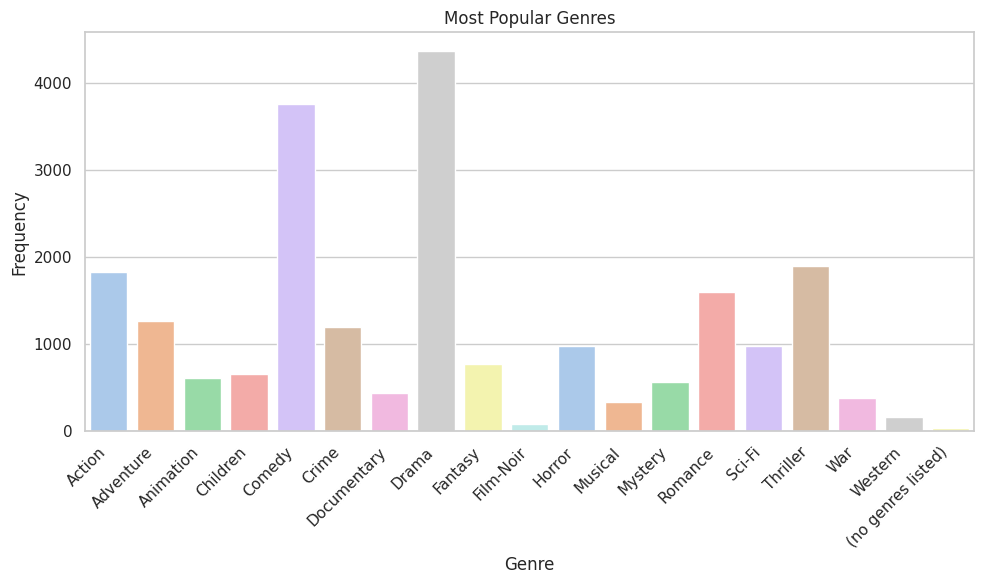

In [106]:
dict = {}
for genre in genres:
    dict[genre] = merged_df[genre].sum()

dict
genres1 = pd.DataFrame(list(dict.items()), columns=['Genre', 'Frequency'])

# Plot the graph
sns.set_theme(style="whitegrid")
palette = sns.color_palette("pastel")
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Frequency', data=genres1, palette=palette)
plt.title('Most Popular Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

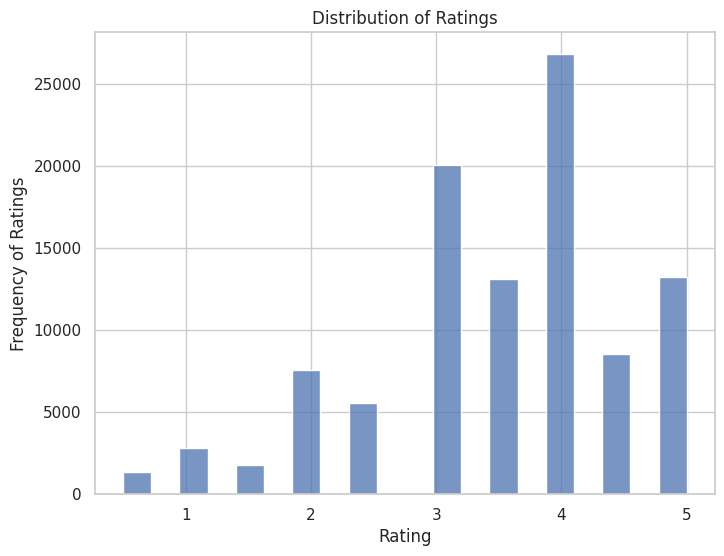

In [107]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(ratings['rating'], bins=20, kde=False)
plt.xlabel('Rating')
plt.ylabel('Frequency of Ratings')
plt.xticks()
plt.title('Distribution of Ratings')
plt.show()